#  Построение модели для определения региона, где добыча нефти принесёт наибольшую прибыль

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.
Шаги для выбора локации обычно такие:

    В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
    Строят модель для предсказания объёма запасов в новых скважинах;
    Выбирают скважины с самыми высокими оценками значений;
    Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

## Задачи проекта
### [Шаг 1. Загрузите и подготовьте данные. Поясните порядок действий.](#step1)

### [Шаг 2. Обучите и проверьте модель для каждого региона](#step2)
#### Шаг 2.1 Разбейте данные на обучающую и валидационную выборки в соотношении 75:25
#### Шаг 2.2 Обучите модель и сделайте предсказания на валидационной выборке
#### Шаг 2.3 Сохраните предсказания и правильные ответы на валидационной выборке
#### Шаг 2.4 Напечатайте на экране средний запас предсказанного сырья и RMSE модели
#### Шаг 2.5 Проанализируйте результаты

### [Шаг 3. Подготовьтесь к расчёту прибыли:](#step3)
#### Шаг 3.1 Все ключевые значения для расчётов сохраните в отдельных переменных
#### Шаг 3.2 Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе
#### Шаг 3.3 Напишите выводы по этапу подготовки расчёта прибыли

### [Шаг 4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели](#step4)
#### Шаг 4.1 Выберите скважины с максимальными значениями предсказаний
#### Шаг 4.2 Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям
#### Шаг 4.3 Рассчитайте прибыль для полученного объёма сырья


### [Шаг 5. Посчитайте риски и прибыль для каждого региона](#step5)
#### Шаг 5.1 Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли
#### Шаг 5.2 Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков
#### Шаг 5.3 Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор


# Этапы выполнения проекта

## Шаг 1. Откроем файлы с данными и изучим общую информацию. <a id='step1'></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df0 = pd.read_csv('C:/Users/Dmitry/Documents/Data/projects/neft/geo_data_0.csv')
df1 = pd.read_csv('C:/Users/Dmitry/Documents/Data/projects/neft/geo_data_1.csv')
df2 = pd.read_csv('C:/Users/Dmitry/Documents/Data/projects/neft/geo_data_2.csv')


Напишем функцию для получения информации по датасетам. Посмотрим информацию, количество дубликатов и корреляцию признаков. 

In [3]:
def getInfo(df):
    print(df.info())
    print('Количество дубликатов:',df.duplicated().value_counts())
    print(df.describe())
    plt.figure(figsize=(5, 5))
    sns.heatmap(df.corr(), annot = True, fmt='.1g', square=True,cmap= 'coolwarm', linewidths=1, linecolor='black')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
None
Количество дубликатов: False    100000
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715

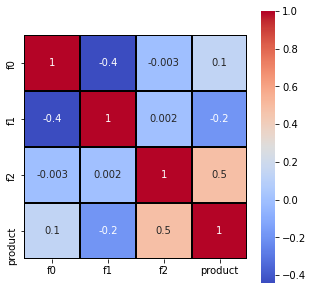

In [4]:
getInfo(df0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
None
Количество дубликатов: False    100000
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999

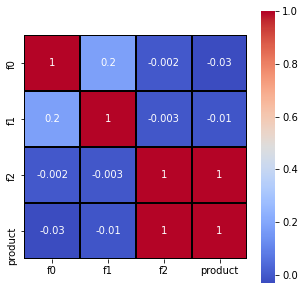

In [5]:
getInfo(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
None
Количество дубликатов: False    100000
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858

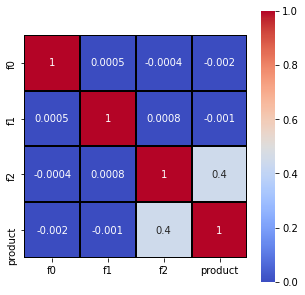

In [6]:
getInfo(df2)

В данных дубликатов необнаружено. 
В df0 видна зависимость признаков f0 и f1, а также f2 и product.
В df1 видна прямая зависимость признаков f2 и product.
В df2 видна зависимость признаков f2 и product.
Краткий итог: на данный момент больше всего выделяется регион df1.


In [7]:
x = df0['product']
y = df1['product']
z = df2['product']

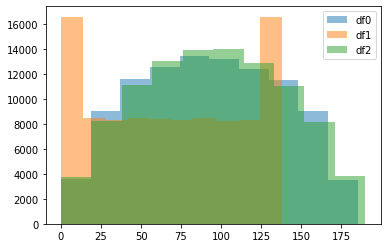

In [8]:
plt.hist(x, alpha=0.5, label='df0')
plt.hist(y, alpha=0.5, label='df1')
plt.hist(z, alpha=0.5, label='df2')
plt.legend(loc='upper right')
plt.show()

Как видно на графике выше - распределение целевого признака df0 и df2 - примерно одинаковое. df1 распределено неравномерно - большое количество скважин имеет низкий показатель объема запасов, но также большое количество скважин имеет и высокий показатель.

## Шаг 2. Обучим и проверим модель для каждого региона. <a id='step2'></a>

Подготовим функцию по обучению моделей, которая будет расчитывать среднее прогнозируемое, среднее фактические и к-т RMSE.

In [9]:
def predictProducts(df):
    features = df.drop(['product','id'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target,test_size=0.25, random_state=12345)
    model = LinearRegression() 
    model.fit(features_train,target_train) 
    predicted_valid = model.predict(features_valid)
    print('Среднее прогнозируемое =',predicted_valid.mean())
    print('Среднее фактическое =',target_valid.mean())
    print('RMSE =',mean_squared_error(target_valid, predicted_valid)**0.5)
    return predicted_valid, target_valid
    
    

In [10]:
predicted_valid_0,target_valid_0 = predictProducts(df0)

Среднее прогнозируемое = 92.59256778438038
Среднее фактическое = 92.07859674082927
RMSE = 37.57942171508131


In [11]:
predicted_valid_1,target_valid_1 = predictProducts(df1)

Среднее прогнозируемое = 68.728546895446
Среднее фактическое = 68.72313602435997
RMSE = 0.8930992867756138


In [12]:
predicted_valid_2,target_valid_2 = predictProducts(df2)

Среднее прогнозируемое = 94.96504596800489
Среднее фактическое = 94.88423280885438
RMSE = 40.02970873393434


Как видно, наилучший показатель квадратного корня из средней квадратичной ошибки у df1. А вот средние показатель запасов - у df2 и df0.

## Шаг 3. Подготовимся к расчёту прибыли. <a id='step3'></a>

Количество групп для разведки в регионе (group) - 500, количество наилучших точек для разработки (best) - 200. 
Бюджет на разработку (budget) - 10 млрд, стоимость барреля (one_barrel) - 450, доход с каждой единицы продукта - 450 тыс. руб.

In [13]:
group = 500
best = 200
budget = 10e9
one_barrel = 450
one_income = 450000


Рассчитаем минимальное количество сырья для безубыточной разработки новой скважины. Сначала рассчитаем, сколько денег должна приносить одна скважина.

In [14]:
development = budget/best

In [15]:
development

50000000.0

Теперь высчитаем, какой объем запаса сырья у нее должен быть. 

In [16]:
min_product = development/one_barrel/1000


In [17]:
min_product

111.11111111111111

Данный показатель выше, чем среднее в регионах. В целом это очевидно, поскольку это среднее 200 наилучших скважин.

## Шаг 4. Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели <a id='step4'></a>

Прибыль рассчитываем следующим образом - выбираем сначала скважины с максимальными значениями предсказаний, далее отфильтровываем полученные индексы на целевых признаках, суммируем и рассчитываем прибыль. 

In [18]:
def revenue(target, probabilities, count, one_income):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return one_income * selected.sum()

## Шаг 5. Посчитаем риски и прибыль для каждого региона <a id='step5'></a>

Напишем две функции - первая рассчитывает прибыль, а вторая - строит доверительный интервал и рассчитыает риск убытков (убыток - если прибыль составляет менее 10 млрд рублей.

In [19]:
def profit(target_valid,predicted_valid,group):
    target = target_valid
    probabilities =  pd.Series(predicted_valid)
    target.reset_index(drop=True, inplace=True)
    values = []
    state = np.random.RandomState(12345)
    for i in range(1000):
        target_subsample = target.sample(n=group, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index] 
        values.append(revenue(target_subsample, probs_subsample, best, one_income))
    values = pd.Series(values)
    return values

In [20]:
def IntervalAndRisk(values, budget):
    lower = values.quantile(0.025)
    high = values.quantile(0.975)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem()) 
    risk = values[values < budget].count()/1000
    print("Средняя выручка:", "{:0,.2f}".format(float(mean)))
    print("2,5%-квантиль:", "{:0,.2f}".format(float(lower)))
    print("97,5%-квантиль:", "{:0,.2f}".format(float(high)))
    print("Доверительный интервал по распределению Стьюдента:", confidence_interval)
    print("Количество исходов, когда прибыль убыточная:", values[values < budget].count())
    print("Риск:", f"{risk:.1%}")

In [21]:
values_0 = profit(target_valid_0,predicted_valid_0,group)

In [22]:
IntervalAndRisk(values_0, budget)

Средняя выручка: 10,425,938,526.91
2,5%-квантиль: 9,897,909,905.16
97,5%-квантиль: 10,947,976,353.36
Доверительный интервал по распределению Стьюдента: (10408732207.068699, 10443144846.752487)
Количество исходов, когда прибыль убыточная: 60
Риск: 6.0%


In [23]:
values_1 = profit(target_valid_1,predicted_valid_1,group)

In [24]:
IntervalAndRisk(values_1, budget)

Средняя выручка: 10,515,222,773.44
2,5%-квантиль: 10,068,873,225.37
97,5%-квантиль: 10,931,547,591.26
Доверительный интервал по распределению Стьюдента: (10501621476.176323, 10528824070.710258)
Количество исходов, когда прибыль убыточная: 10
Риск: 1.0%


In [25]:
values_2 = profit(target_valid_2,predicted_valid_2,group)

In [26]:
IntervalAndRisk(values_2, budget)

Средняя выручка: 10,435,008,362.78
2,5%-квантиль: 9,871,119,452.67
97,5%-квантиль: 10,969,706,954.18
Доверительный интервал по распределению Стьюдента: (10417453552.041359, 10452563173.524155)
Количество исходов, когда прибыль убыточная: 64
Риск: 6.4%


Рассмотрим графики распределения прибыли.

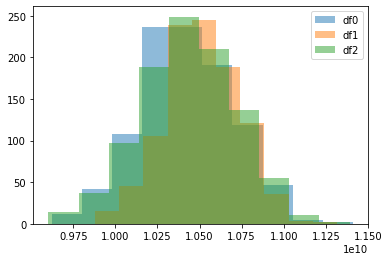

In [27]:
plt.hist(values_0, alpha=0.5, label='df0')
plt.hist(values_1, alpha=0.5, label='df1')
plt.hist(values_2, alpha=0.5, label='df2')
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Плотность')

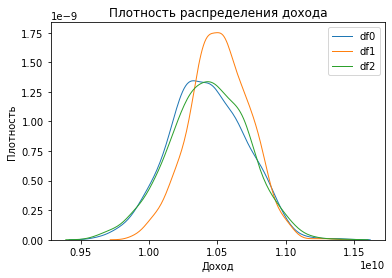

In [28]:
sns.distplot(values_0, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'df0')
sns.distplot(values_1, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'df1')
sns.distplot(values_2, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'df2')

plt.legend(loc='upper right')
plt.title('Плотность распределения дохода')
plt.xlabel('Доход')
plt.ylabel('Плотность')

Перед нами стояла задача определить наиболее прибыльный регион. Путем обучения модели и предсказывания запасов сырья, а также расчета прибыли и риска, можно сделать вывод, что регион c df1 наиболее выгодный по следующим причинам:
 - наибольшая плотность распределения дохода (выше 10 млрд. рублей)
 - наибольшая средняя выручка
 - наиболее узкий доверительный интервал
 - наименьший риск оказаться в убытке